In [1]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn import datasets
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
    
from sklearn import svm

def versiontuple(v):
    return tuple(map(int, (v.split("."))))

In [217]:
## from: Raschka & Mirjalili

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c=[],
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [218]:
def splitData(features):
    iris = datasets.load_iris()
    X = iris.data[:, features]
    y = iris.target

    #print('Class labels:', np.unique(y))
    feature_labels = ['sepal length [cm]', 'sepal width [cm]', 'petal length [cm]', 'petal width [cm]']
    
#     print("Features: ")
#     for i in features:
#         print(feature_labels[i], " ")
        
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
                          
    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))
    
    return X_train, X_test, y_train, y_test, X_train_std, X_test_std, X_combined_std, y_combined

In [219]:
features = [0,1,2,3]
X_train, X_test, y_train, y_test, X_train_std, X_test_std, X_combined_std, y_combined = splitData(features)


## finding best C and gamma for sigmoid, code from sci-kit documentation 
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1.0, 'gamma': 0.1} with a score of 0.97


### SVM Kernels

In [220]:
C = 1.0
classifiers = (svm.SVC(kernel = 'linear', probability = True, C=C),
          svm.SVC(kernel = 'sigmoid', gamma = .1, probability = True, C=C),
          svm.SVC(kernel='rbf', gamma = 0.7, probability=  True, C=C),
          svm.SVC(kernel='poly', degree = 3, probability = True, C=C),
         )

classifiers = [clf.fit(X_train_std,y_train) for clf in classifiers]

In [221]:
classifiers[0].kernel

'linear'

In [223]:
for classifier in classifiers:
    print('Kernel:', classifier.kernel)
    y_train_predict = classifier.predict(X_train_std)
    self_accuracy = accuracy_score(y_train, y_train_predict)
    print("Accuracy for training data (self)", self_accuracy)

    y_test_predict = classifier.predict(X_test_std)
    test_accuracy = accuracy_score(y_test, y_test_predict)
    print("Accuracy for test data", test_accuracy)
    print("")
   
    


Kernel: linear
Accuracy for training data (self) 0.9714285714285714
Accuracy for test data 0.9777777777777777

Kernel: sigmoid
Accuracy for training data (self) 0.9619047619047619
Accuracy for test data 0.9777777777777777

Kernel: rbf
Accuracy for training data (self) 0.9809523809523809
Accuracy for test data 0.9777777777777777

Kernel: poly
Accuracy for training data (self) 0.9142857142857143
Accuracy for test data 0.8888888888888888



In [330]:
C = 1.0
classifer = svm.SVC(kernel = 'linear', probability = True, C=C)

print('Kernel:', classifier.kernel)
y_train_predict = classifier.predict(X_train_std)
print(y_train_predict)
self_accuracy = accuracy_score(y_train, y_train_predict)
print("Accuracy for training data (self)", self_accuracy)

y_test_predict = classifier.predict(X_test_std)
test_accuracy = accuracy_score(y_test, y_test_predict)
print("Accuracy for test data", test_accuracy)
print("")


Kernel: poly
[1 2 2 1 2 1 2 1 1 1 1 1 2 1 2 1 0 1 1 1 1 1 2 0 0 2 1 0 0 1 0 1 1 0 1 2 1
 0 2 2 2 2 0 0 1 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0
 1 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 1 0 1 1 1 1 0 0 0 2 1 2 0]
Accuracy for training data (self) 0.9142857142857143
Accuracy for test data 0.8888888888888888



No handles with labels found to put in legend.


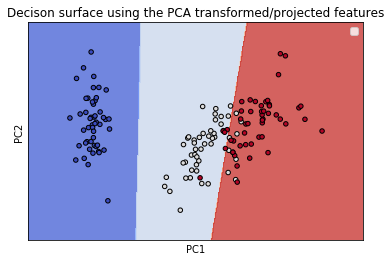

In [332]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(Xreduced, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
ax.legend()
plt.show()

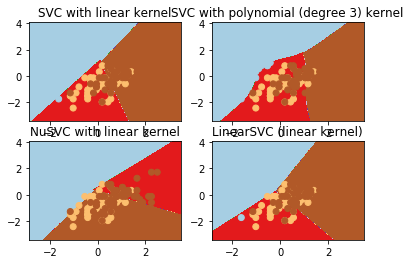

In [339]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
X_adjusted = X[:, :2]
Y = y
h=.02 # step size in the mesh
svc     = svm.SVC(kernel='linear').fit(X_adjusted , y)
rbf_svc = svm.SVC(kernel='poly').fit(X_adjusted , Y)
nu_svc  = svm.NuSVC(kernel='linear').fit(X_adjusted ,Y)
lin_svc = svm.LinearSVC().fit(X_adjusted , Y)

# create a mesh to plot in
x_min, x_max = X_adjusted [:,0].min()-1, X[:,0].max()+1
y_min, y_max = X_adjusted [:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with polynomial (degree 3) kernel',
          'NuSVC with linear kernel',
          'LinearSVC (linear kernel)']


plt.set_cmap(plt.cm.Paired)

for i, clf in enumerate((svc, rbf_svc, nu_svc, lin_svc)):
    # Plot the decision boundary. For that, we will asign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i+1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.set_cmap(plt.cm.Paired)
    plt.contourf(xx, yy, Z)
    plt.axis('tight')

    # Plot also the training points
    plt.scatter(X_adjusted [:,0], X_adjusted [:,1], c=Y)

    plt.title(titles[i])

plt.axis('tight')
plt.show()